# 6 Final parameter estimates

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from corner import corner
from scipy.stats import norm

from pytransit.contamination.plotting import joint_marginal_plot, plot_two_sided_kde, _jplot
from pytransit.utils import md_rs_from_rho

In [3]:
%run toi_519.py
%run ../src/core.py

AAOCW, AAPGW = 3.4645669, 7.0866142

In [22]:
df = derive_qois(read_mcmc('toi_519.01_tess_and_gb.nc'), star_r, star_teff)
df['k_app_tess'] = sqrt(df.k2_app_tess)
df['cnt_tess'] = 1. - df.k2_app_tess / df.k2_true

rstar_d = split_normal(0.373, 0.088, 0.020, size=df.shape[0]) * Rsun.to(Rjup)

df['r_true'] = df.k_true.values * rstar_d
df['r_app'] = df.k_app.values * rstar_d

rstar_d = split_normal(0.365, 0.030, 0.026, size=df.shape[0]) * Rsun.to(Rjup)
#rstar_d = normal(0.342, 0.031, size=df.shape[0]) * Rsun.to(Rjup)
df['r_true_2'] = df.k_true.values * rstar_d
df['r_app_2'] = df.k_app.values * rstar_d

Schweitzer+2019

In [14]:
star_m

0.369+/-0.05

In [16]:
ns = 1000
star_r3 = normal(0.0282, 0.0068, ns) + normal(0.935, 0.015, ns) * normal(0.36, 0.03, ns)

In [19]:
rr = percentile(star_r3, [50, 16, 84])

In [21]:
rr[0], rr[1:] - rr[0]

(0.36588314632324614, array([-0.03018138,  0.02680105]))

In [13]:
ufloat(0.0282, 0.0068) + ufloat(0.935, 0.015) * star_m

0.373215+/-0.04756509986324007

In [5]:
from pytransit.orbits.orbits_py import impact_parameter_ec

In [6]:
log10(4)

0.6020599913279624

In [7]:
impact_parameter_ec(10., radians(88.8), 0.999, 0.5*pi, -1)

0.4186389734683014

In [8]:
rstar = md_rs_from_rho(ufloat(df.rho.mean(), df.rho.std()), 2000)

In [9]:
rstar.mean(), rstar.std()

(0.3360375938348218, 0.00731868082464695)

In [23]:
parameters = 'tc p rho b inc teff_h k_app k_app_tess k_true r_true r_true_2 r_app a_st a_au t14_h teff_p cnt_tess'.split()
for p in parameters:
    pqs = percentile(df[p], [50, 16, 84, 99])
    print (f"{p:10} & {pqs[0]:20.7f} & {pqs[1]-pqs[0]:+15.7f} & {pqs[2]-pqs[0]:+15.7f} & P(99) {pqs[-1]:15.7f} \\\\")

tc         &      2458491.8771151 &      -0.0001313 &      +0.0001367 & P(99) 2458491.8774074 \\
p          &            1.2652328 &      -0.0000005 &      +0.0000005 & P(99)       1.2652339 \\
rho        &           12.1337184 &      -0.4166898 &      +0.4866278 & P(99)      13.3866879 \\
b          &            0.1994700 &      -0.0935138 &      +0.0547947 & P(99)       0.3006498 \\
inc        &           88.8668349 &      -0.3210461 &      +0.5371987 & P(99)      89.9404703 \\
teff_h     &         3305.6797839 &    -100.0351433 &     +98.1266540 & P(99)    3544.4445988 \\
k_app      &            0.2938653 &      -0.0039116 &      +0.0037189 & P(99)       0.3018969 \\
k_app_tess &            0.2466242 &      -0.0038325 &      +0.0037597 & P(99)       0.2553440 \\
k_true     &            0.2980374 &      -0.0053287 &      +0.0083258 & P(99)       0.3231178 \\
r_true     &            1.0731225 &      -0.2418775 &      +0.0768181 & P(99)       1.2449690 \\
r_true_2   &            1.0614

In [10]:
parameters = 'tc p rho b inc teff_h k_app k_app_tess k_true r_true r_app a_st a_au t14_h teff_p cnt_tess'.split()
for p in parameters:
    pqs = percentile(df[p], [50, 16, 84, 99])
    print (f"{p:10} & {pqs[0]:20.7f} & {pqs[1]-pqs[0]:+15.7f} & {pqs[2]-pqs[0]:+15.7f} & P(99) {pqs[-1]:15.7f} \\\\")

tc         &      2458491.8771151 &      -0.0001313 &      +0.0001367 & P(99) 2458491.8774074 \\
p          &            1.2652328 &      -0.0000005 &      +0.0000005 & P(99)       1.2652339 \\
rho        &           12.1337184 &      -0.4166898 &      +0.4866278 & P(99)      13.3866879 \\
b          &            0.1994700 &      -0.0935138 &      +0.0547947 & P(99)       0.3006498 \\
inc        &           88.8668349 &      -0.3210461 &      +0.5371987 & P(99)      89.9404703 \\
teff_h     &         3305.6797839 &    -100.0351433 &     +98.1266540 & P(99)    3544.4445988 \\
k_app      &            0.2938653 &      -0.0039116 &      +0.0037189 & P(99)       0.3018969 \\
k_app_tess &            0.2466242 &      -0.0038325 &      +0.0037597 & P(99)       0.2553440 \\
k_true     &            0.2980374 &      -0.0053287 &      +0.0083258 & P(99)       0.3231178 \\
r_true     &            1.0730617 &      -0.2406666 &      +0.0772318 & P(99)       1.2468965 \\
r_app      &            1.0587

In [11]:
pars = 'k_app k_true r_true'.split()
names = 'ka kt rt'.split()
lims = 'median lower upper'.split()

for i,p in enumerate(pars):
    qs = df[p].quantile([0.5, 0.05, 0.95])
    for j,q in enumerate(qs):
        print(f"\\newcommand{{\\{names[i]}{lims[j]}}}{{{q:.3f}\\xspace}}")

\newcommand{\kamedian}{0.294\xspace}
\newcommand{\kalower}{0.288\xspace}
\newcommand{\kaupper}{0.300\xspace}
\newcommand{\ktmedian}{0.298\xspace}
\newcommand{\ktlower}{0.290\xspace}
\newcommand{\ktupper}{0.315\xspace}
\newcommand{\rtmedian}{1.073\xspace}
\newcommand{\rtlower}{0.663\xspace}
\newcommand{\rtupper}{1.196\xspace}


In [28]:
m = df.teff_c < 2900

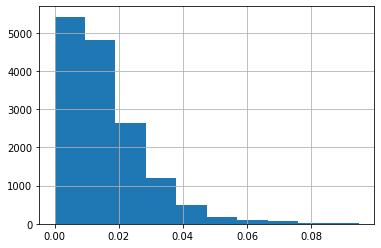

In [36]:
df.cnt[m].hist()

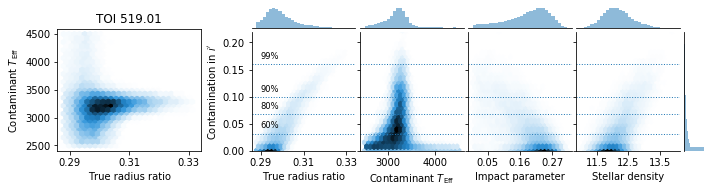

In [11]:
def joint_marginal_plot2(df, fw=10, nb=30, gs=25, **kwargs):
    return _jplot(df.k_true, df.teff_c, df.cnt, df.b, df.rho, fw, nb, gs, **kwargs)[0]

fig = joint_marginal_plot2(df, htelim=(0.288, 0.332), ctelim=(2500, 4500), rlim=(11,14), blim=(0.0, 0.32), clim=(0,0.22))
setp(fig.axes[0:2], xlabel='True radius ratio')
setp(fig.axes[0:2], xticks=(0.29, 0.31, 0.33))
ps = percentile(df.cnt, [60, 80, 90, 99])
[[ax.axhline(p, lw=1, ls=':') for p in ps] for ax in fig.axes[1:5]]
[fig.axes[1].text(0.29, p+0.01, '{:2d}%'.format(t), size='small') for p,t in zip(ps, [60, 80, 90, 99])]
setp(fig.axes[1], xticks=(0.29, 0.31, 0.33))
setp(fig.axes[3], xticks=(0.05, 0.16, 0.27))
setp(fig.axes[4], xticks=(11.5,12.5,13.5))

fig.axes[0].set_title('TOI 519.01');
fig.savefig('plots/toi_519_01_contamination_posteriors.pdf')

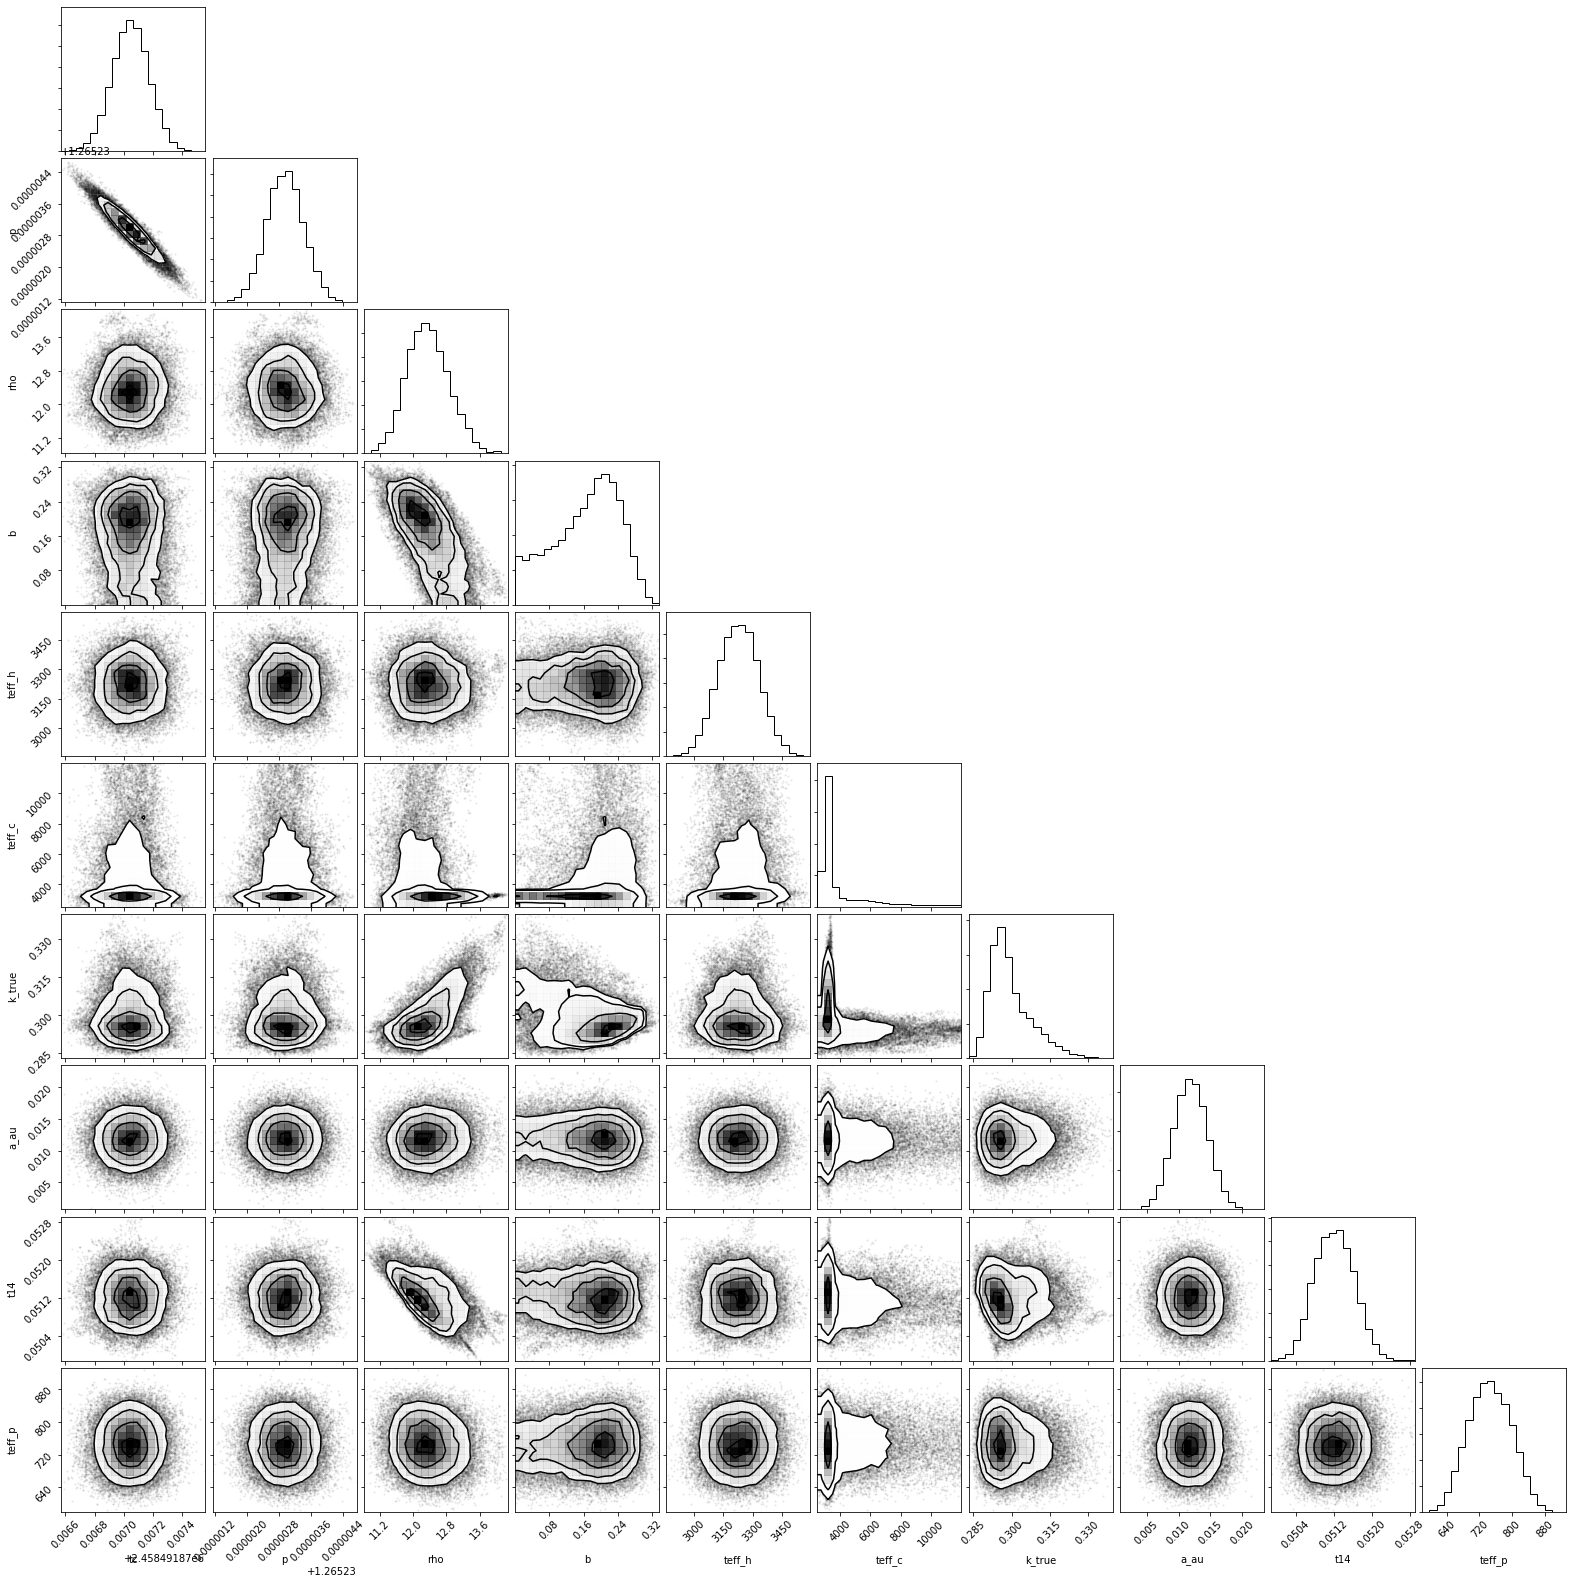

In [37]:
corner(df['tc p rho b teff_h teff_c k_true a_au t14 teff_p'.split()]);

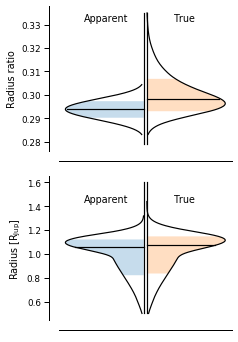

In [91]:
with sb.plotting_context('paper'):
    fig, axs = subplots(2, 1, figsize=(AAOCW,1.4*AAOCW))
    plot_two_sided_kde(df.k_app, df.k_true, clip=(0.279, 0.335), ax=axs[0])
    axs[0].text(-0.5, 0.335, 'Apparent', ha='center', va='top')
    axs[0].text( 0.5, 0.335, 'True', ha='center', va='top')
    setp(axs[0], xticks=[], ylabel='Radius ratio')

    plot_two_sided_kde(df.r_app, df.r_true, clip=(0.5, 1.6), bw=0.1, ax=axs[1])
    setp(axs[1], xticks=[], ylabel='Radius [R$_{\mathrm{Jup}}$]')
    axs[1].text(-0.5, 1.5, 'Apparent', ha='center', va='top')
    axs[1].text( 0.5, 1.5, 'True', ha='center', va='top')
    sb.despine(fig, offset=10)
    fig.tight_layout()
fig.savefig('plots/toi_519_01_r_distributions.pdf')

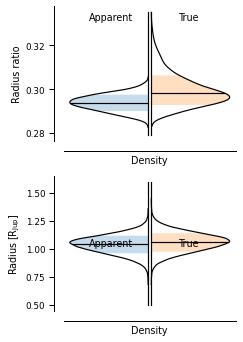

In [24]:
with sb.plotting_context('paper'):
    fig, axs = subplots(2, 1, figsize=(AAOCW,1.4*AAOCW))
    plot_two_sided_kde(df.k_app, df.k_true, clip=(0.279, 0.335), ax=axs[0], bw=0.2)
    axs[0].text(-0.5, 0.335, 'Apparent', ha='center', va='top')
    axs[0].text( 0.5, 0.335, 'True', ha='center', va='top')
    setp(axs[0], xticks=[], ylabel='Radius ratio')

    plot_two_sided_kde(df.r_app_2, df.r_true_2, clip=(0.5, 1.6), bw=0.1, ax=axs[1])
    setp(axs[1], xticks=[], ylabel='Radius [R$_{\mathrm{Jup}}$]')
    axs[1].text(-0.5, 1.1, 'Apparent', ha='center', va='top')
    axs[1].text( 0.5, 1.1, 'True', ha='center', va='top')
    sb.despine(fig, offset=10)
    fig.tight_layout()
#fig.savefig('plots/toi_519_01_r_distributions.pdf')

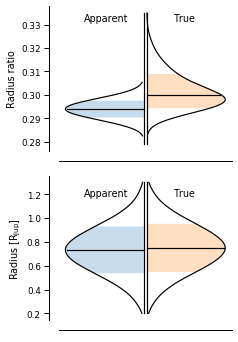

In [10]:
with sb.plotting_context('paper'):
    fig, axs = subplots(2, 1, figsize=(AAOCW,1.4*AAOCW))
    plot_two_sided_kde(df.k_app, df.k_true, clip=(0.279, 0.335), ax=axs[0])
    axs[0].text(-0.5, 0.335, 'Apparent', ha='center', va='top')
    axs[0].text( 0.5, 0.335, 'True', ha='center', va='top')
    setp(axs[0], xticks=[], ylabel='Radius ratio')

    plot_two_sided_kde(df.r_app, df.r_true, clip=(0.2, 1.3), bw=0.1, ax=axs[1])
    setp(axs[1], xticks=[], ylabel='Radius [R$_{\mathrm{Jup}}$]')
    axs[1].text(-0.5, 1.25, 'Apparent', ha='center', va='top')
    axs[1].text( 0.5, 1.25, 'True', ha='center', va='top')
    sb.despine(fig, offset=10)
    fig.tight_layout()
fig.savefig('plots/toi_519_01_r_distributions.pdf')

---


<center> © 2020 Hannu Parviainen </center>